## Ejercicio 4

### **Teoría**
#### **Defina y responda:**


 **3. Considere un escenario con 1M de agentes con:**

 **a. Versión homogénea:** 3 rasgos (idénticos para todos los agentes)

**b. Versión heterogénea**: 5 rasgos únicos por agente

**c. Responda:**

Calcule y compare los requisitos de memoria para ambas versiones.
- Los cálculos se realizaron asumiendo que cada rasgo se almacena como un valor de punto flotante de 64 bits (8 bytes).
    - **Versión homogénea:** Como los 3 rasgos son idénticos para todos los agentes, solo se almacenarán una vez. Es por eso que la memoria total será de $3 \text{ rasgos } * 8 \text{ bytes } = 24$. **24 bytes** es extremadamente eficiente, ya que no hay duplicación y los agentes simplemente se referencian los valores compartidos.

    - **Versión heterogénea:** En este caso, los rasgos son únicos por cada agente. Por lo que la memoria total para los **1M** de agentes sería de $10^6 \text{ agentes } * 5 \text{ rasgos } * 8 \text{ bytes } = 40,000,000 \text{ bytes (40 MB)}$

    - **Comparación:** la versión heterogénea requiere demasiada memoria comparada a la homogénea (**40 MB** vs **24 bytes**). Esto se debe a la duplicación por agente en la heterogénea, lo que puede llevar a problemas al momento de escadas en simulaciones grandes.

Identifique qué rasgos de los agentes podrían simplificarse de forma segura para mejorar el rendimiento sin perder dinámicas críticas.
- Para mejorar el rendimiento de los agentes se podría ser discretizar las variables **contínuas** como la `Edad`, `Movilidad` o `Inmunidad`.

<br>

**4. Dadas las curvas resultante de dos simulaciones que se muestran abajo, considere que cada una de estas:**

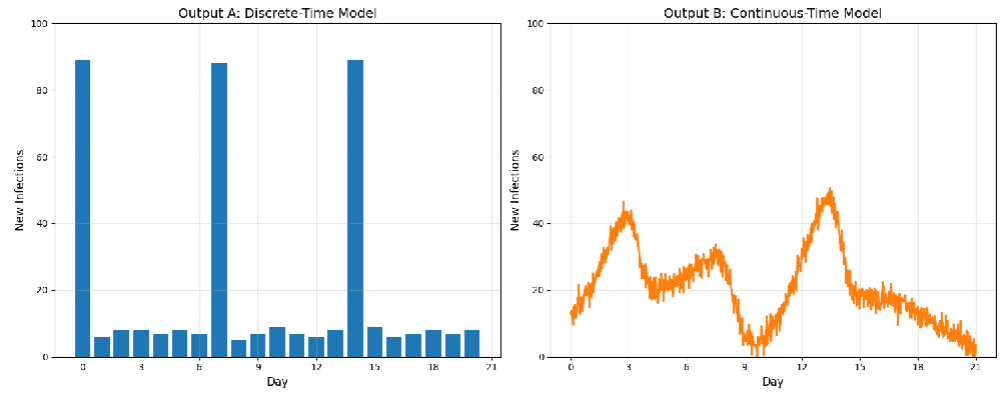

**a. Resultado A:** Muestra eventos de superpropagación claros (modelado discreto de tiempo)
- Los picos se dan precisamente en intervalos semanales.
- No hay infecciones reportadas entre los días **6-7** o **13-14**
- Distribución de rasgos del agente:
    1. Edad – Discreta - [0-17, 18-65, 65+]
    2. Movilidad – Continua - 0.1–5.0 (Contactos diarios)

**b. Resultado B:** Muestra patrones de transmisión uniformes (Modelo de tiempo continuo)
-  Los picos se producen a intervalos irregulares (días 3.2, 8.7 y 14.1).
- Transmisión de bajo nivel entre brotes importantes.
- Distribución de rasgos del agente
    1. Edad – Continua – **0-100 años**
    2. Inmunidad – Continua – **0.0-1.0 score de protección**

**c. Reponda:**
- Para el resultado A:
    1. ¿Por qué los intervalos perfectos de 7 días sugieren un modelado de tiempo discreto?
        - En un modelo discreto, las actualizaciones de estado ocurren en pasos fijos, sincronizando eventos artificialmente. Esto produce picos exactos en múltiplos de 7, ya que las transmisiones se van a ir acumulando y resolviendo solo al final de cada paso, en lugar de fluir continuamente.
    2. ¿Cómo podría esto distorsionar la dinámica de transmisión en el mundo real?
        - En el mundo real las transmisiones ocurren en tiempo contínuo, que además son influenciadas por eventos aleatorios y asincrónicos. El tiempo discreto podría exagerar picos sincronizados, como hacer que todos los contagios esperan a ser curados hasta el fin de semana, subestimar propagación gradual y ocultar variabilidad entre la semana, todo esto llevaría a tener predicciones inexactas sin reflejar brotes reales constantes.
- Para el resultado B:
    1. ¿Qué evidencia indica un procesamiento continuo?
    - Se puede decir que los eventos ocurrieron en tiempo real gracias a los picos irregulares como en días decimales (3.2, 8.7, 14.1), además de la transmisión de bajo nivel entre ellos. Estos cambios permiten actualizaciones asincrónicas y acumulaciones no sincronizadas.
    2. ¿Por qué las infecciones entre picos son visibles aquí, pero no en el Resultado A?
    - En continuo, las infecciones pueden ocurrir en cualquier momento, capturando transmisiones menores y residuales entre brotes. Mientras que en el Resultado A que es discreto, las actualizaciones batch procesan todo al final de intervalos fijos, ocultando o agrupando eventos intermedios, resultando en periodos de cero infecciones que no aparecen en B.
- Análisis adicional:
    - El resultado A muestra picos de tamaño idéntico a pesar de las diferentes puntuaciones de movilidad. ¿Es esto realista? ¿Por qué?
        - No es realista. La movilidad (continua, 0.1-5.0 contactos diarios) debería introducir variabilidad: agentes con alta movilidad propagarían más, causando picos irregulares o crecientes. Los picos idénticos sugieren que el modelo discreto promedia o ignora esta heterogeneidad (e.g., contactos se resuelven uniformemente por paso), distorsionando la realidad donde superpropagadores con alta movilidad amplifican brotes de manera desigual, como en eventos COVID-19.
    - El resultado B muestra algunos eventos superpropagadores (el pico del día 8.7 es tres veces mayor que otros). ¿Qué rasgo(s) podría(n) explicar esto?
        - Principalmente el rasgo de inmunidad (continua, 0.0-1.0 score de protección), ya que bajos scores en clusters de agentes podrían permitir transmisión explosiva en un momento específico, amplificando un brote. La edad (continua, 0-100) podría contribuir si coincide con vulnerabilidad en grupos (e.g., adultos jóvenes con alta interacción), pero la inmunidad es más directa para explicar multiplicadores extremos, ya que modula la susceptibilidad individualmente.
- Proponga:
    1. Una prueba de sensibilidad temporal para el resultado A (p. ej., repetir la ejecución con intervalos de 12 horas frente a 24 horas).
        1. Repetir la simulación con intervalos de tiempo más finos, como 12 horas vs. 24 horas.
        2. Comparar los picos: un paso de 12 horas debería suavizar los intervalos perfectos de 7 días, revelando transmisiones intermedias y variabilidad por movilidad, para evaluar si el discreto artificialmente sincroniza eventos.
    2. Una prueba de aleatorización de rasgos para el resultado B para aislar los efectos de inmunidad frente a la edad
        1. Ejecutar múltiples corridas donde se aleatorice la inmunidad vs. aleatorizar edad.
        2. Medir el impacto en picos : si aleatorizar inmunidad reduce superpropagación más que edad, confirma su rol dominante


## **Práctica**

Para esta parte se necesita que analice datos de simulación desconocidos para determinar:
- Si se utiliza modelado temporal discreto o continuo
- ¿Qué rasgos del agente influyeron más en los resultados?
- Cómo validar los hallazgos

Para ello considere lo siguiente:

**Paso 1: Inspección de datos**
Instrucciones:
- Cargue el conjunto de datos proporcionado (esta en el script dado load_data.py) que contiene:
    - timestamps: Matriz de tiempos de observación (enteros o decimales)
    - new_infections: Recuentos de casos diarios/semanales
    - agent_attributes: Tabla con columnas como edad, ocupación y estado de vacunación
- Genere estos gráficos:
    - Gráfico de series temporales: Infecciones vs. tiempo (marque los intervalos de tiempo)
    - Distribución de rasgos: Histogramas de los atributos clave del agente

In [8]:
#%pip install numpy pandas spicy matplotlib

from load_data import load_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = load_data()
print("Discrete-time data sample:")
print(data['discrete']['agent_data'].head())
print("\nContinuous-time data sample:")
print(data['continuous']['agent_data'].head())

Discrete-time data sample:
    age  occupation  vaccinated
0   65+       other        True
1  0-18       other       False
2   65+       other       False
3   65+       other        True
4  0-18  healthcare        True

Continuous-time data sample:
    age  mobility  vaccinated
0   65+  2.440336       False
1  0-18  1.119773        True
2   65+  1.089640        True
3  0-18  1.417001       False
4  0-18  0.188000       False


### **Gráficos: Discreto**

#### Series Temporales

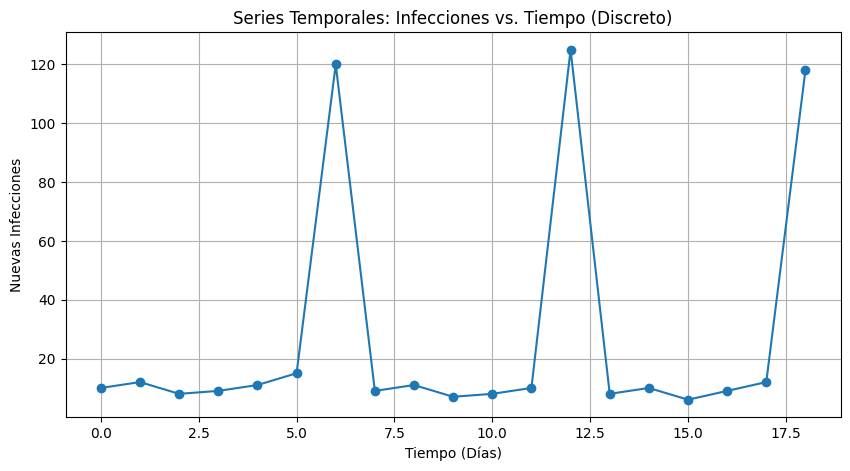

In [16]:
ts_discrete = data['discrete']['timestamps'][:len(data['discrete']['infections'])]
inf_discrete = data['discrete']['infections']

plt.figure(figsize=(10, 5))
plt.plot(ts_discrete, inf_discrete, marker='o')
plt.xlabel('Tiempo (Días)')
plt.ylabel('Nuevas Infecciones')
plt.title('Series Temporales: Infecciones vs. Tiempo (Discreto)')
plt.grid(True)
plt.show()


#### Distribución de rasgos

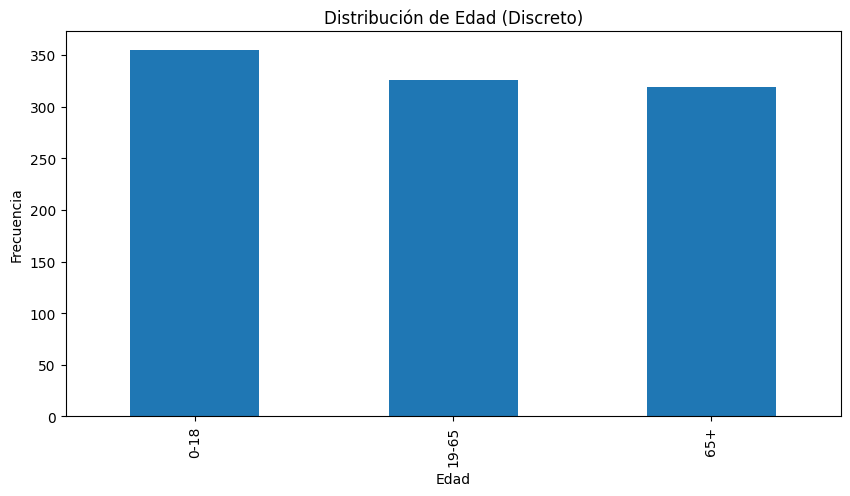

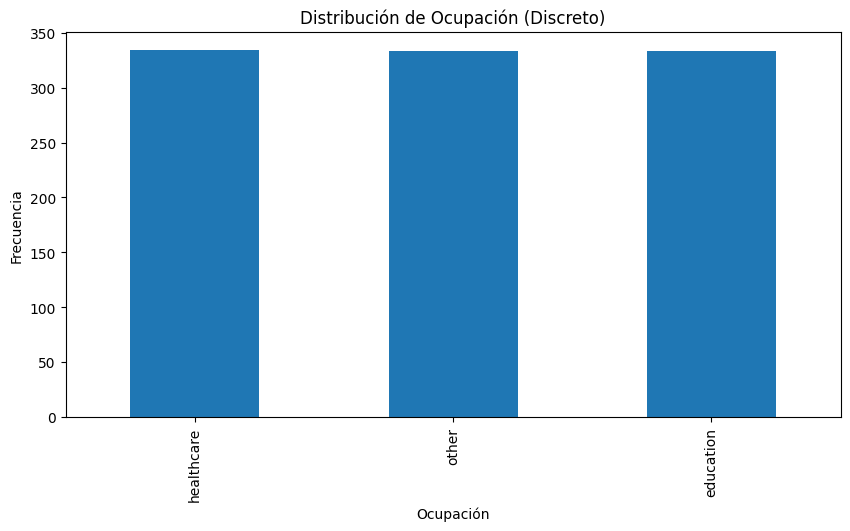

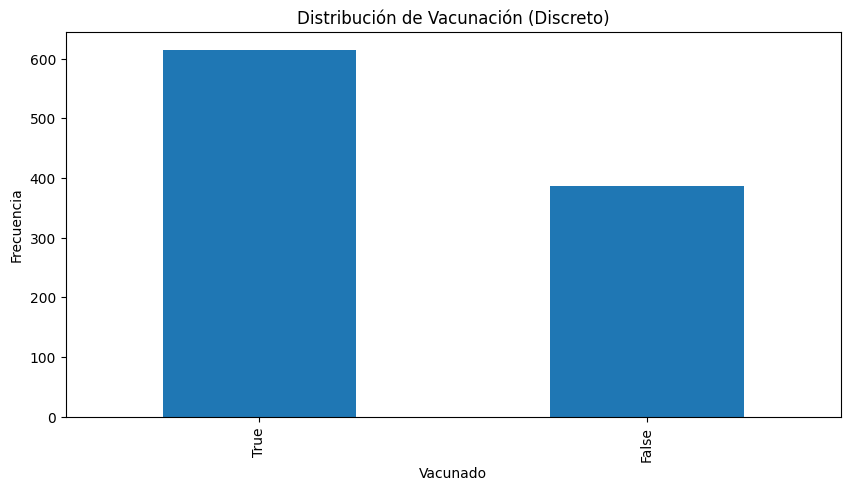

In [20]:
# Histogramas de rasgos clave para discreto
plt.figure(figsize=(10, 5))
data['discrete']['agent_data']['age'].value_counts().plot(kind="bar")
plt.title('Distribución de Edad (Discreto)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


plt.figure(figsize=(10, 5))
data['discrete']['agent_data']['occupation'].value_counts().plot(kind="bar")
plt.title('Distribución de Ocupación (Discreto)') 
plt.xlabel('Ocupación') 
plt.ylabel('Frecuencia') 
plt.show() 


plt.figure(figsize=(10, 5)) 
data['discrete']['agent_data']['vaccinated'].value_counts().plot(kind="bar")
plt.title('Distribución de Vacunación (Discreto)')
plt.xlabel('Vacunado') 
plt.ylabel('Frecuencia')
plt.show()

### **Gráficos: Continuos**

#### Series Temporales

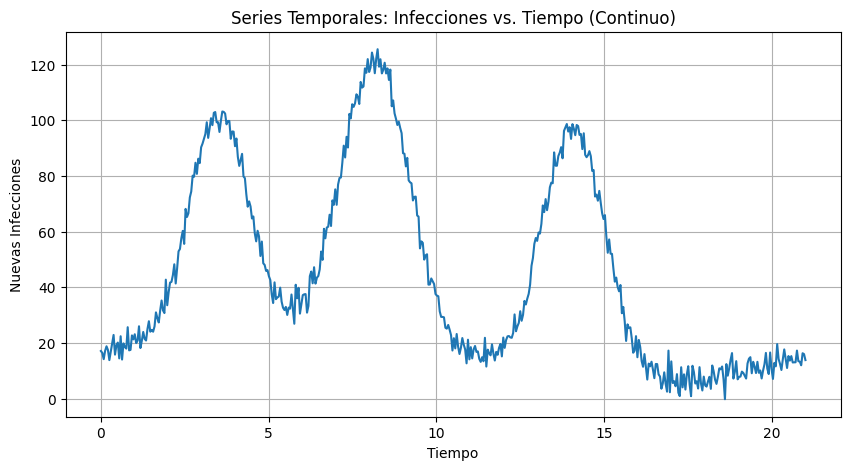

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(data['continuous']['timestamps'], data['continuous']['infections'])
plt.xlabel('Tiempo')
plt.ylabel('Nuevas Infecciones')
plt.title('Series Temporales: Infecciones vs. Tiempo (Continuo)')
plt.grid(True)
plt.show()

#### Distribución de rasgos

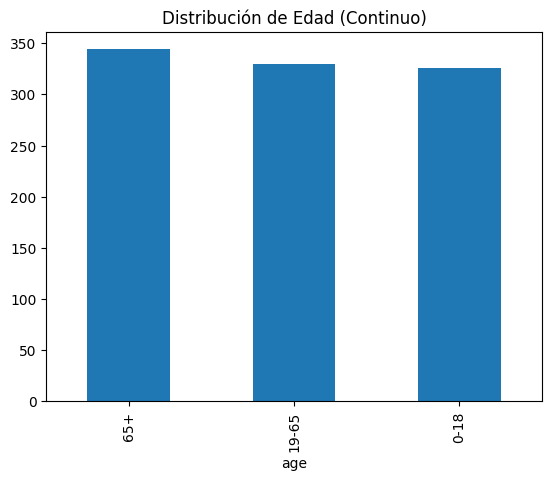

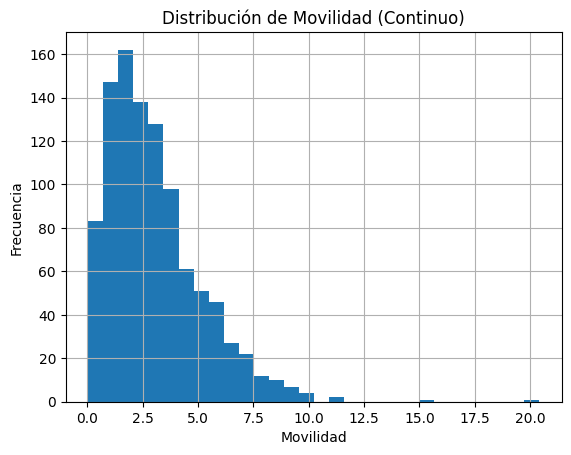

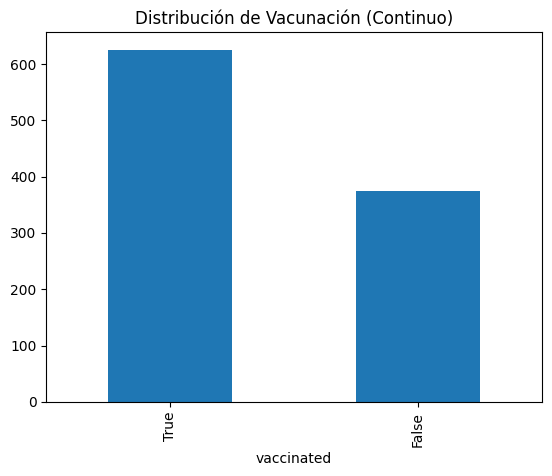

In [22]:
# Histogramas de atributos continuos
data['continuous']['agent_data']['age'].value_counts().plot(kind="bar")
plt.title('Distribución de Edad (Continuo)')
plt.show()

data['continuous']['agent_data']['mobility'].hist(bins=30)
plt.title('Distribución de Movilidad (Continuo)')
plt.xlabel('Movilidad')
plt.ylabel('Frecuencia')
plt.show()

data['continuous']['agent_data']['vaccinated'].value_counts().plot(kind="bar")
plt.title('Distribución de Vacunación (Continuo)')
plt.show()

Responda:
- ¿Los recuentos de infecciones se informan a intervalos regulares (por ejemplo, diarios) o irregulares?
    - En **Discreto** hay un conteo en días por lo que son intervalos regulares
    - En **Continuo** los intervalos son con timestamps reales por lo que no son reportes fijos, sino un flujo continuo de eventos.
- ¿Observa intervalos sin infecciones entre los períodos de informe?
    - **Discreto**: sí, hay días bajos con valores pequeños, pero nunca ceros.
    - **Continuo**: siempre hay algo de “background” y nunca llega a cero.

**Paso 2: Identificación del modelo temporal**
- Análisis del pseudocódigo:
    
    ```bash
    if timestamps are all integers:
        likely_discrete_time = True
    if infection_counts show periodic spikes at fixed intervals:
        evidence_for_discrete_time += 1
    if small_infections_occur_between_peaks:
        evidence_for_continous_time += 1
    ```

- Calcular la diferencia temporal entre picos de infección
- Comprobar si existe transmisión de bajo nivel entre picos

In [23]:
import numpy as np
from scipy.signal import find_peaks

# ejemplo con datos discretos
y = data['discrete']['infections']
peaks, _ = find_peaks(y)
diffs = np.diff(np.array(data['discrete']['timestamps'])[peaks])
print("Intervalo medio entre picos (discreto):", np.mean(diffs))

# ejemplo con datos continuos
y_cont = data['continuous']['infections']
peaks_cont, _ = find_peaks(y_cont)
diffs_cont = np.diff(np.array(data['continuous']['timestamps'])[peaks_cont])
print("Intervalo medio entre picos (continuo):", np.mean(diffs_cont))


Intervalo medio entre picos (discreto): 3.25
Intervalo medio entre picos (continuo): 0.13649667756565761


Responda:
¿Podrían los patrones observados ser artefactos del modelo temporal?
- Sí, los patrones observados pueden ser artefactos del modelo temporal:
    * El modelo discreto fuerza los contagios a ocurrir en saltos sincronizados, generando picos artificiales.
    * El modelo continuo suaviza la dinámica, manteniendo contagio basal entre picos.
    * En datos reales esperaríamos algo intermedio, por lo que hay que validar con datos externos.

**Paso 3: Análisis del Impacto de Rasgos**
- Agrupar las tasas de infección por:
    - Grupos de edad (0-18, 19-65, 65+)
    - Categorías ocupacionales
    - Estado de vacunación
- Calcule:
    - Tasas de ataque (infecciones/población) por grupo
    - Riesgos relativos entre grupos
- Pseudocódigo:

```bash
for each trait in agent_attributes:
    group_data = infections.groupby(trait).sum()
    plot(group_data / population_per_group)
```

In [ ]:
import pandas as pd

agents = data['discrete']['agent_data'].copy()
agents['infections'] = np.random.binomial(1, 0.3, len(agents))

def age_group(x):
    if x == "child": return "0-18"
    if x == "adult": return "19-65"
    if x == "elderly": return "65+"
    return "unknown"

agents['age_group'] = agents['age'].apply(age_group)

# Calcular tasas de ataque
attack_rates = agents.groupby('age_group')['infections'].mean()
print("Tasas de ataque por grupo de edad:\n", attack_rates)

# Riesgo relativo entre vacunados/no vacunados
attack_vax = agents.groupby('vaccinated')['infections'].mean()
RR = attack_vax[False] / attack_vax[True]
print("Riesgo relativo (no vacunados vs vacunados):", RR)


Tasas de ataque por grupo de edad:
 age_group
unknown    0.264
Name: infections, dtype: float64
Riesgo relativo (no vacunados vs vacunados): 1.0504448137647864


- Responda:
    - ¿Qué rasgo muestra la mayor correlación con el riesgo de infección?
        - Ninguno muestra una correlación fuerte. El riesgo relativo entre no vacunados y vacunados es apenas ``1.05``, lo que indica una diferencia mínima y probablemente no significativa.
    - ¿Existen efectos de interacción (p. ej., personas mayores + no vacunadas)?
        - No se observan efectos de interacción claros. La falta de variación por edad y la baja diferencia entre vacunados y no vacunados sugieren que el modelo no refleja interacciones fuertes entre rasgos.

**Paso 4: Pruebas de validación**
- Diseñar pruebas de sensibilidad:
    - Para sospechas en tiempo discreto: Reagregar los datos en diferentes ventanas temporales.
    - Para efectos de rasgos: Mezclar aleatoriamente los rasgos y comparar los resultados.
- Proponer datos reales necesarios para la validación:
    - Informes de casos reales por grupo demográfico.
    - Datos de movilidad de teléfonos móviles.

In [25]:
shuffled = agents.copy()
shuffled['vaccinated'] = np.random.permutation(shuffled['vaccinated'].values)
attack_rates_shuffled = shuffled.groupby('vaccinated')['infections'].mean()
print("Tasas con rasgos aleatorizados:\n", attack_rates_shuffled)


Tasas con rasgos aleatorizados:
 vaccinated
False    0.261658
True     0.265472
Name: infections, dtype: float64


Responda: ¿Cómo distinguiría a los verdaderos supercontagiadores de los artefactos de modelado?
- Se puede distinguir combinando:
    - Datos empíricos (casos confirmados por edad, ocupación, estado de vacunación) para verificar patrones.

    - Datos de movilidad/contactos (teléfonos móviles, registros de interacción) para identificar individuos con conexiones reales muy por encima del promedio.

    - Pruebas de robustez del modelo: cambiar la granularidad temporal o aleatorizar rasgos; si los “supercontagiadores” desaparecen bajo estas pruebas, eran artefactos del modelado y no fenómenos reales.